In [ ]:
# Hamiltonian Eigenvalues

In [79]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

$V(x) = -V_0 e^{-\alpha x^2}$

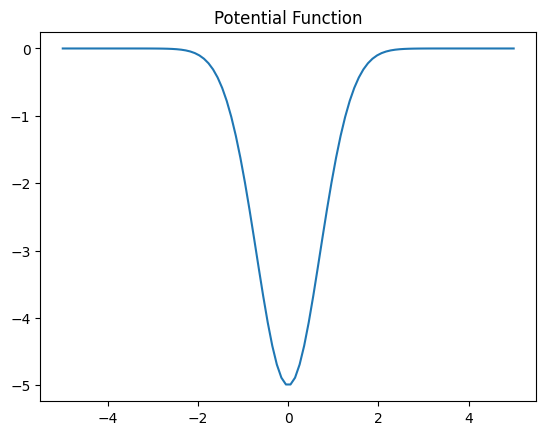

In [80]:
# declarations
n = 100
L = 5
V_0 = -5
alpha = 1
x = np.linspace(-L, L, n)
dx = (2*L)/n
V = np.zeros(n)
h = np.zeros((n, n))

# functions
def potential(x):
    return V_0*(np.e**(-alpha*(x**2)))


# plot potential
for i in range(0, n):
    V[i] = potential(x[i])

plt.plot(x, V)
plt.title("Potential Function")
plt.show()

Lowest 5 Eigenvalues:
[-3.597582036404873, -1.2511981892605217, -0.00286625192872413, 0.29449969885352084, 0.5878413846866425]


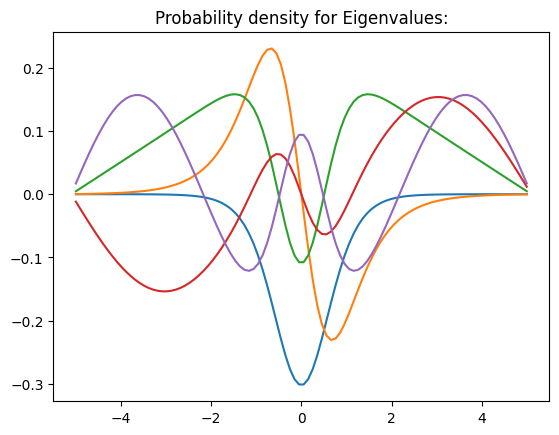

First 3 Eigenvectors:
[[-1.09737629e-06  1.29875440e-04  4.67722229e-03 -1.17899971e-02
   1.70010470e-02  2.20978883e-02  2.72064188e-02 -3.17528566e-02
   6.98665454e-02 -3.64586638e-02  4.95751446e-02 -5.37865674e-02
  -5.79228728e-02  6.59623997e-02  6.19804100e-02  4.52831512e-02
  -7.36919190e-02 -8.81629158e-02  8.46744426e-02  8.10981306e-02
   9.15609564e-02  9.48659226e-02 -9.80751592e-02 -1.01186020e-01
  -1.15174759e-01  1.12594035e-01 -1.09902381e-01  1.17642253e-01
   1.19994304e-01  1.22228794e-01  1.04195885e-01 -1.24343700e-01
   1.26337104e-01  1.29952265e-01 -1.31570727e-01  1.20823205e-02
  -1.20959145e-02  2.26568795e-02  2.25582782e-02  1.33061104e-01
  -1.34422038e-01 -1.35652292e-01 -1.36750749e-01  3.05910276e-02
  -3.12614335e-02 -1.37716416e-01 -1.38548426e-01  3.84051830e-02
  -4.54162512e-02  1.40235735e-01  1.39808634e-01 -3.50810692e-02
  -4.72667812e-02 -5.28044668e-02  5.62430253e-02 -1.40526982e-01
  -6.05084478e-02 -1.40682151e-01  6.42875392e-02  1.4

In [81]:
# generate matrix
for i in range(0, n):
    #h[i][i] = (1/(2*(dx**2)))+V[i]
    h[i][i] = (1/(dx**2))+V[i]
    if i != n-1:
        h[i][i+1] = -1/(2*(dx**2))
    if i != 0:
        h[i][i-1] = -1/(2*(dx**2))

# find eigenvalues and eigenvectors
h_eig = np.linalg.eig(h)

# sort eigenvalues and transpose the eigenvectors
h_eig_sorted = sorted(h_eig[0])
psi = np.transpose(h_eig[1])

# display some results
print("Lowest 5 Eigenvalues:")
print(h_eig_sorted[0:5])

plt.title("Probability density for Eigenvalues:")
n_mesh = np.linspace(-L, L, n)
for i in range(5):
    plt.plot(n_mesh, psi[i])
plt.show()

print("First 3 Eigenvectors:")
print(h_eig[1][0:3])